In [1]:
from image_dashboard import widgets
from matplotlib.pyplot import imread
import imagej
import os
import pandas, xarray

import ipywidgets as widgets
import pandas

from bokeh.io import output_notebook, show, push_notebook
from bokeh.plotting import figure

from bokeh.models import CustomJS
from bokeh.models.sources import ColumnDataSource
from bokeh.layouts import column, row, WidgetBox
from bokeh.models.widgets import DataTable, Slider, Spinner, TableColumn, Button, Panel, Tabs, HTMLTemplateFormatter, Select, CheckboxGroup
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

In [13]:
output_notebook()

Loading BokehJS ...

In [5]:
ij = imagej.init()

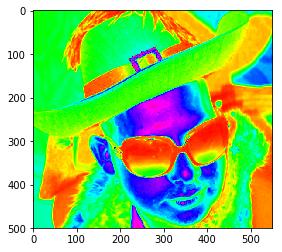

In [6]:
from matplotlib.pyplot import imread
import numpy as np
img = imread('new-lenna.jpg')
img = np.mean(img[500:1000,300:850], axis=2)
ij.py.show(img, cmap = 'hsv')

In [2]:
fb = widgets.FileBrowser("/run/user/1000/gvfs/smb-share:server=1g.evostor.evolbio.mpg.de,share=mpistaff/Diaz")

In [3]:
fb.gui()

Text(value='/run/user/1000/gvfs/smb-share:server=1g.evostor.evolbio.mpg.de,share=mpistaff/Diaz', layout=Layout…

Select(description='Select directory', layout=Layout(width='80%'), options=('..', '1-TIMELAPSES_2019_1-1', 'Ba…

Button(description='Open', style=ButtonStyle(), tooltip='Click to open directory')

In [4]:
image_files = [os.path.join(fb.parent_dir, f) for f in fb._dir.options if f.split('.')[-1].lower() in ['tif', 'png', 'jpeg']]
image_files = [image_file for image_file in image_files if os.path.isfile(image_file)]
image_files.sort()

In [5]:
images = [imread(f) for f in image_files]

In [6]:
widgets.browse_images(images)

interactive(children=(IntSlider(value=3, description='i', max=7), Output()), _dom_classes=('widget-interact',)…

In [7]:
# Load corresponding results table
image_file = image_files[1]

In [8]:
dirname, base = os.path.split(image_file)

In [9]:
base = "DATA_" + base

In [3]:
#data_dir = os.path.join(dirname, base)
data_dir = '/home/grotec/Desktop/Results/DATA_OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif'

In [4]:
data_dir

'/home/grotec/Desktop/Results/DATA_OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif'

In [5]:
data_files = os.listdir(data_dir)

In [6]:
data_files.sort()

In [7]:
frames=dict()

In [8]:
for data_file in data_files:
    print(data_file)
    key = data_file.split("_")[-1].split(".")[0]
    try:
        frames[key] = pandas.read_csv(os.path.join(data_dir, data_file), delimiter=",", header=0, encoding="Latin-1")
    except:
        print("Could not read %s" % data_file)
        raise    

Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_1.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_10.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_100.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_101.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_102.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_103.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_104.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_105.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_106.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_107.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_108.txt
Statistics fo

Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_25.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_26.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_27.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_28.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_29.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_3.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_30.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_31.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_32.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_33.txt
Statistics for Result of OLex_0_CaCl2_pH_0_0p5M_Pro_0p5M_PP_0p2gmL.tif (blue).tif_34.txt
Statistics for Result 

In [14]:
# Be careful, loading the entire frames dict may stall the kernel.
tabs=Tabs()
for idx in range(1,11):
    frame = frames[str(idx)]
    columns = [TableColumn(field=c, title=c) for c in list(frame.columns)]
    cds = ColumnDataSource(data=frame)
    data_table = DataTable(source=cds, columns=columns)
    tabs.tabs.append(Panel(child=data_table, title=str(idx)))


show(tabs)

In [25]:
# bokeh plot
def correlation_plot(x_column, y_column, title=None):
    if title is None:
        title  = '1'
    cds = ColumnDataSource(frames[title][[x_column, y_column]])
    p = figure(plot_width=700,
               plot_height=700,
               #title=title,
               #x_axis_label = x_column,
               #y_axis_label = y_column,
               )
    p.circle(x=x_column, y=y_column, source=cds, size=10, alpha=0.8)
    
    return p

In [26]:
pl = correlation_plot("X", "Y", '1')

In [27]:
tab = Panel(child=row(pl, pl))
    #tab = Panel(child=row(p,))
tabs = Tabs(tabs=[tab])

In [28]:
show(tabs)

In [29]:
a = tabs.active


In [30]:
t = tabs.tabs[0]

In [32]:
t.child

Row(id='10121', ...)

In [33]:
row = t.child

In [34]:
children = row.children

In [35]:
children

[Figure(id='10084', ...), Figure(id='10084', ...)]

In [36]:
children.remove?

In [37]:
del row

In [39]:

del children
del t 
del a

In [166]:
r = pl.renderers[0]

In [167]:
r.data_source.data

{'index': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175,

In [92]:
ds = r.data_source

In [179]:
show(pl)

In [174]:
df = pandas.DataFrame()

In [ ]:
df.to

In [188]:
ds = pl.renderers[0].data_source

In [189]:
ds.

ColumnDataSource(id='11679', ...)

In [187]:
pl.renderers[0].data_source.data['x'] = frames['10']['Mean'].to_numpy()
pl.renderers[0].data_source.data['y'] = frames['10']['Y'].to_numpy()

AttributeError: 'NoneType' object has no attribute 'values'

In [186]:
show(pl)

In [142]:
ds

ColumnDataSource(id='7100', ...)

ERROR:bokeh.server.protocol_handler:error handling message Message 'PATCH-DOC' (revision 1) content: {'events': [{'kind': 'ModelChanged', 'model': {'type': 'Select', 'id': '8163'}, 'attr': 'value', 'new': '109'}], 'references': []}: AttributeError("unexpected attribute 'data_source' to Circle, possible attributes are angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, radius, radius_dimension, radius_units, size, subscribed_events, tags, x or y")
ERROR:bokeh.server.protocol_handler:error handling message Message 'PATCH-DOC' (revision 1) content: {'events': [{'kind': 'ModelChanged', 'model': {'type': 'Select', 'id': '8163'}, 'attr': 'value', 'new': '1'}], 'references': []}: AttributeError("unexpected attribute 'data_source' to Circle, possible attributes are angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_c

In [99]:
d = ds.data

In [116]:
gl = r.glyph

In [118]:
gl.

{'angle',
 'angle_units',
 'fill_alpha',
 'fill_color',
 'js_event_callbacks',
 'js_property_callbacks',
 'line_alpha',
 'line_cap',
 'line_color',
 'line_dash',
 'line_dash_offset',
 'line_join',
 'line_width',
 'name',
 'radius',
 'radius_dimension',
 'radius_units',
 'size',
 'subscribed_events',
 'tags',
 'x',
 'y'}

In [103]:
columns_to_plot = []
def update(attr, old, new):
    # Get the list of carriers for the graph
    columns_to_plot = [column_selection.labels[i] for i in 
                        carrier_selection.active]
    

In [105]:
column_selection = CheckboxGroup(labels=frames['1'].columns.to_list())
column_selection.on_change('active', update)

In [108]:
show(column_selection)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/server.html



In [109]:
columns_to_plot

[]

In [99]:
column_selection.

[]

In [ ]:
# Set up an application
handler = FunctionHandler()
app = Application(handler)

In [86]:
selected_columns = [column_selection.labels[i] for i in column_selection.active]
print(selected_columns)

['Volume (µm^3)', 'Surface (µm^2)']


In [82]:
if len(selected_columns) not in  [1,2]:
    raise RuntimeError("Select exactly one or two columns for the correlation plot.")
    
correlation_plot(ColumnDataSource(frames['1']), selected_columns[0], selected_columns[1], '1')

In [9]:
def modify(doc):
    # bokeh plot
    
    def idx_update(attr, old, new):

        #print(new)
        cds = ColumnDataSource(frames[str(int(new))])
        
        p = figure(plot_width=700,
               plot_height=700,
               title=str(int(new)),
               x_axis_label = x_column_selection.value,
               y_axis_label = y_column_selection.value,
               )
        p.circle(x=x_column_selection.value, y=y_column_selection.value, source=cds, size=10, alpha=0.8)
        
        #print(tabs.tabs[0].child.children) 
        tabs.tabs[0].child.children[1] = p        
        
        #push_notebook()
        
    def x_update(attr, old, new):
        #p.reset.emit()
        p.renderers[0].glyph.x = new
        #push_notebook()
        
    def y_update(attr, old, new):
        #p.reset.emit()
        p.renderers[0].glyph.y = new
        #push_notebook()
    # Get the list of carriers for the graph
        #x_column_selection.title=new
    
    # Attach callbacks.
    idx_as_ints = [int(k) for k in frames.keys()]
    idx_as_ints.sort()
    idx_selection = Slider(start=idx_as_ints[0], end=idx_as_ints[-1], step=1.0, value=idx_as_ints[0], title="Select frame id")
    idx_selection = Spinner(low=idx_as_ints[0], high=idx_as_ints[-1], step=1.0, value=idx_as_ints[0], title="Select frame id")
    idx_selection.on_change('value', idx_update)
    #idx_selection.on_change('value', x_update)
    #idx_selection.on_change('value', y_update)
    
    x_column_selection = Select(options=frames[str(int(idx_selection.value))].columns.to_list(), title="Select x axis column", value="Volume (µm^3)")
    x_column_selection.on_change('value', x_update)
    
    y_column_selection = Select(options=frames[str(int(idx_selection.value))].columns.to_list(), title="Select y axis column", value="Volume (µm^3)")
    y_column_selection.on_change('value', y_update)
    
    cds = ColumnDataSource(frames[str(int(idx_selection.value))])

    p = figure(plot_width=700,
               plot_height=700,
               title=str(int(idx_selection.value)),
               x_axis_label = x_column_selection.value,
               y_axis_label = y_column_selection.value,
              )
    p.circle(x=x_column_selection.value, y=y_column_selection.value, source=cds, size=10, alpha=0.8)
        
    tab = Panel(child=row(column(idx_selection, x_column_selection, y_column_selection), p))
    #tab = Panel(child=row(p,))
    tabs = Tabs(tabs=[tab])
    
    doc.add_root(tabs)

handler = FunctionHandler(modify)
app = Application(handler)

In [10]:
show(app)

RuntimeError: no display hook installed for notebook type None

## Using xarray, so far not successfull

In [135]:
xr = xarray.DataArray(frames['1'], dims=['index','Variable name',])

In [142]:
xr_set = xarray.concat([xarray.DataArray(frames[k], dims=['index','Variable name',]) for k in frames.keys()], dim=pandas.Index(frames.keys(), name='file id'))

In [143]:
xr_set

<xarray.DataArray (file id: 179, index: 2374, Variable name: 27)>
array([[[10.2384, 10.238395, ..., '0.003925', 0.001284],
        [2.0736, 2.0736, ..., '0.004072', 0.000362],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[11.1456, 11.145592, ..., '0.004154', 0.001359],
        [2.0736, 2.0736, ..., '0.004000', 0.000354],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[0.7776, 0.7776, ..., '0.002085', 0.00045999999999999996],
        [1.0368, 1.0368, ..., '0.002318', 0.000336],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[0.9072, 0.9072, ..., '0.002487', 0.000549],
        [1.0368, 1.0368, ..., '0.002318', 0.000336],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=object)
Coordinates:
  * index          (index) int64 0 1 2 3 4 5 6 ... 2368 2369 2370 2371 2372 2373
  * Variable name  (Variabl

In [145]:
xr_set.loc[:,:,"Volume (µm^3)"]

<xarray.DataArray (file id: 179, index: 2374)>
array([[10.2384, 2.0736, 428.58721900000006, ..., nan, nan, nan],
       [11.1456, 2.0736, 430.531219, ..., nan, nan, nan],
       [0.5184, 1.0368, 8.8128, ..., nan, nan, nan],
       ...,
       [0.3888, 1.296, 9.2016, ..., nan, nan, nan],
       [0.7776, 1.0368, 8.0352, ..., nan, nan, nan],
       [0.9072, 1.0368, 8.164800999999999, ..., nan, nan, nan]], dtype=object)
Coordinates:
  * index          (index) int64 0 1 2 3 4 5 6 ... 2368 2369 2370 2371 2372 2373
    Variable name  <U13 'Volume (µm^3)'
  * file id        (file id) object '1' '10' '100' '101' ... '96' '97' '98' '99'

In [163]:
xr_set.loc['100'].plot.imshow()

TypeError: Plotting requires coordinates to be numeric or dates of type np.datetime64 or datetime.datetime or pd.Interval.

In [ ]:
xr_set.loc['100',:,'Volume (µm^3)'].dropna

In [128]:
xa = xarray.DataArray.from_dict({'dims' : ('file_id', 'frames)

ValueError: cannot convert dict without the key 'data''

In [118]:
xa

<xarray.Dataset>
Dimensions:  (dim_0: 2374, dim_1: 27)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 ... 2367 2368 2369 2370 2371 2372 2373
  * dim_1    (dim_1) object 'Volume (µm^3)' ... 'Radius Size X-axis (µm)'
Data variables:
    1        (dim_0, dim_1) object 10.24 10.24 79 27 20145 ... nan nan nan nan
    10       (dim_0, dim_1) object 11.15 11.15 86 28 21930 ... nan nan nan nan
    100      (dim_0, dim_1) object 0.5184 0.5184 4 4 1020 ... nan nan nan nan
    101      (dim_0, dim_1) object 0.9072 0.9072 7 6 1785 ... nan nan nan nan
    102      (dim_0, dim_1) object 1.296 1.296 10 8 2550 ... nan nan nan nan nan
    103      (dim_0, dim_1) object 0.5184 0.5184 4 4 1020 ... nan nan nan nan
    104      (dim_0, dim_1) object 1.037 1.037 8 7 2040 ... nan nan nan nan nan
    105      (dim_0, dim_1) object 1.166 1.166 9 7 2295 ... nan nan nan nan nan
    106      (dim_0, dim_1) object 0.9072 0.9072 7 6 1785 ... nan nan nan nan
    107      (dim_0, dim_1) object 1.296 1.296 10 8

In [122]:
xa['1'].coords['dim_1']

<xarray.DataArray 'dim_1' (dim_1: 27)>
array(['Volume (µm^3)', 'Surface (µm^2)', 'Nb of obj. voxels',
       'Nb of surf. voxels', 'IntDen', 'Mean', 'StdDev', 'Median', 'Min',
       'Max', 'X', 'Y', 'Z', 'Mean dist. to surf. (µm)',
       'SD dist. to surf. (µm)', 'Median dist. to surf. (µm)', 'XM', 'YM',
       'ZM', 'BX', 'BY', 'BZ', 'B-width', 'B-height', 'B-depth',
       'Radius Size Y-axis (µm)', 'Radius Size X-axis (µm)'], dtype=object)
Coordinates:
  * dim_1    (dim_1) object 'Volume (µm^3)' ... 'Radius Size X-axis (µm)'

In [127]:
xa

<xarray.Dataset>
Dimensions:  (dim_0: 2374, dim_1: 27)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 ... 2367 2368 2369 2370 2371 2372 2373
  * dim_1    (dim_1) object 'Volume (µm^3)' ... 'Radius Size X-axis (µm)'
Data variables:
    1        (dim_0, dim_1) object 10.24 10.24 79 27 20145 ... nan nan nan nan
    10       (dim_0, dim_1) object 11.15 11.15 86 28 21930 ... nan nan nan nan
    100      (dim_0, dim_1) object 0.5184 0.5184 4 4 1020 ... nan nan nan nan
    101      (dim_0, dim_1) object 0.9072 0.9072 7 6 1785 ... nan nan nan nan
    102      (dim_0, dim_1) object 1.296 1.296 10 8 2550 ... nan nan nan nan nan
    103      (dim_0, dim_1) object 0.5184 0.5184 4 4 1020 ... nan nan nan nan
    104      (dim_0, dim_1) object 1.037 1.037 8 7 2040 ... nan nan nan nan nan
    105      (dim_0, dim_1) object 1.166 1.166 9 7 2295 ... nan nan nan nan nan
    106      (dim_0, dim_1) object 0.9072 0.9072 7 6 1785 ... nan nan nan nan
    107      (dim_0, dim_1) object 1.296 1.296 10 8